## Importing all Libraries

In [210]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [211]:
# Filtering out the warnings
warnings.filterwarnings('ignore')

## Reading the data

In [212]:
cars=pd.read_csv('CarPrice_Assignment.csv')

In [213]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [214]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [215]:
cars.shape

(205, 26)

In [216]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning

In [217]:
cars.duplicated().sum()

0

In [218]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No duplicated or null values

In [219]:
cars["CarName"][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

In [220]:
# Seaparating the Car brand name and storing in car company column
cars['car_company']=cars['CarName'].apply(lambda x:x.split(' ')[0])

In [221]:
# As now CarName column is redundant we will remove it
cars = cars.drop(['CarName'], axis =1)

In [222]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [223]:
# Dropping car id column
cars = cars.drop(['car_ID'], axis =1)

In [224]:
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
maxda           2
vw              2
porcshce        1
Nissan          1
vokswagen       1
toyouta         1
mercury         1
Name: car_company, dtype: int64

Some car company names are misspelled like toyota is written as toyouta once, we need to correct it

In [225]:
cars['car_company'].replace('toyouta', 'toyota',inplace=True)
cars['car_company'].replace('Nissan', 'nissan',inplace=True)
cars['car_company'].replace('maxda', 'mazda',inplace=True)
cars['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars['car_company'].replace('vw', 'volkswagen',inplace=True)
cars['car_company'].replace('porcshce', 'porsche',inplace=True)

In [226]:
cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

In [227]:
cars['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [228]:
cars['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [229]:
cars['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [230]:
cars["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [231]:
def number(x):
    return x.map({'one':1, 'two' : 2,'three':3,'four' : 4,'five':5, 'six':6, 'eight':8,'twelve':12})



Converting the door number and cylinder number column to numeric as numbers are written in string format

In [232]:
cars[["cylindernumber","doornumber"]]=cars[["cylindernumber","doornumber"]].apply(number)

In [233]:
cars['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [234]:
cars["cylindernumber"].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [235]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

##  Data Visualization

In [236]:
numeric=cars.select_dtypes(include=["int64","float64"])

In [237]:
numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2160x2160 with 0 Axes>

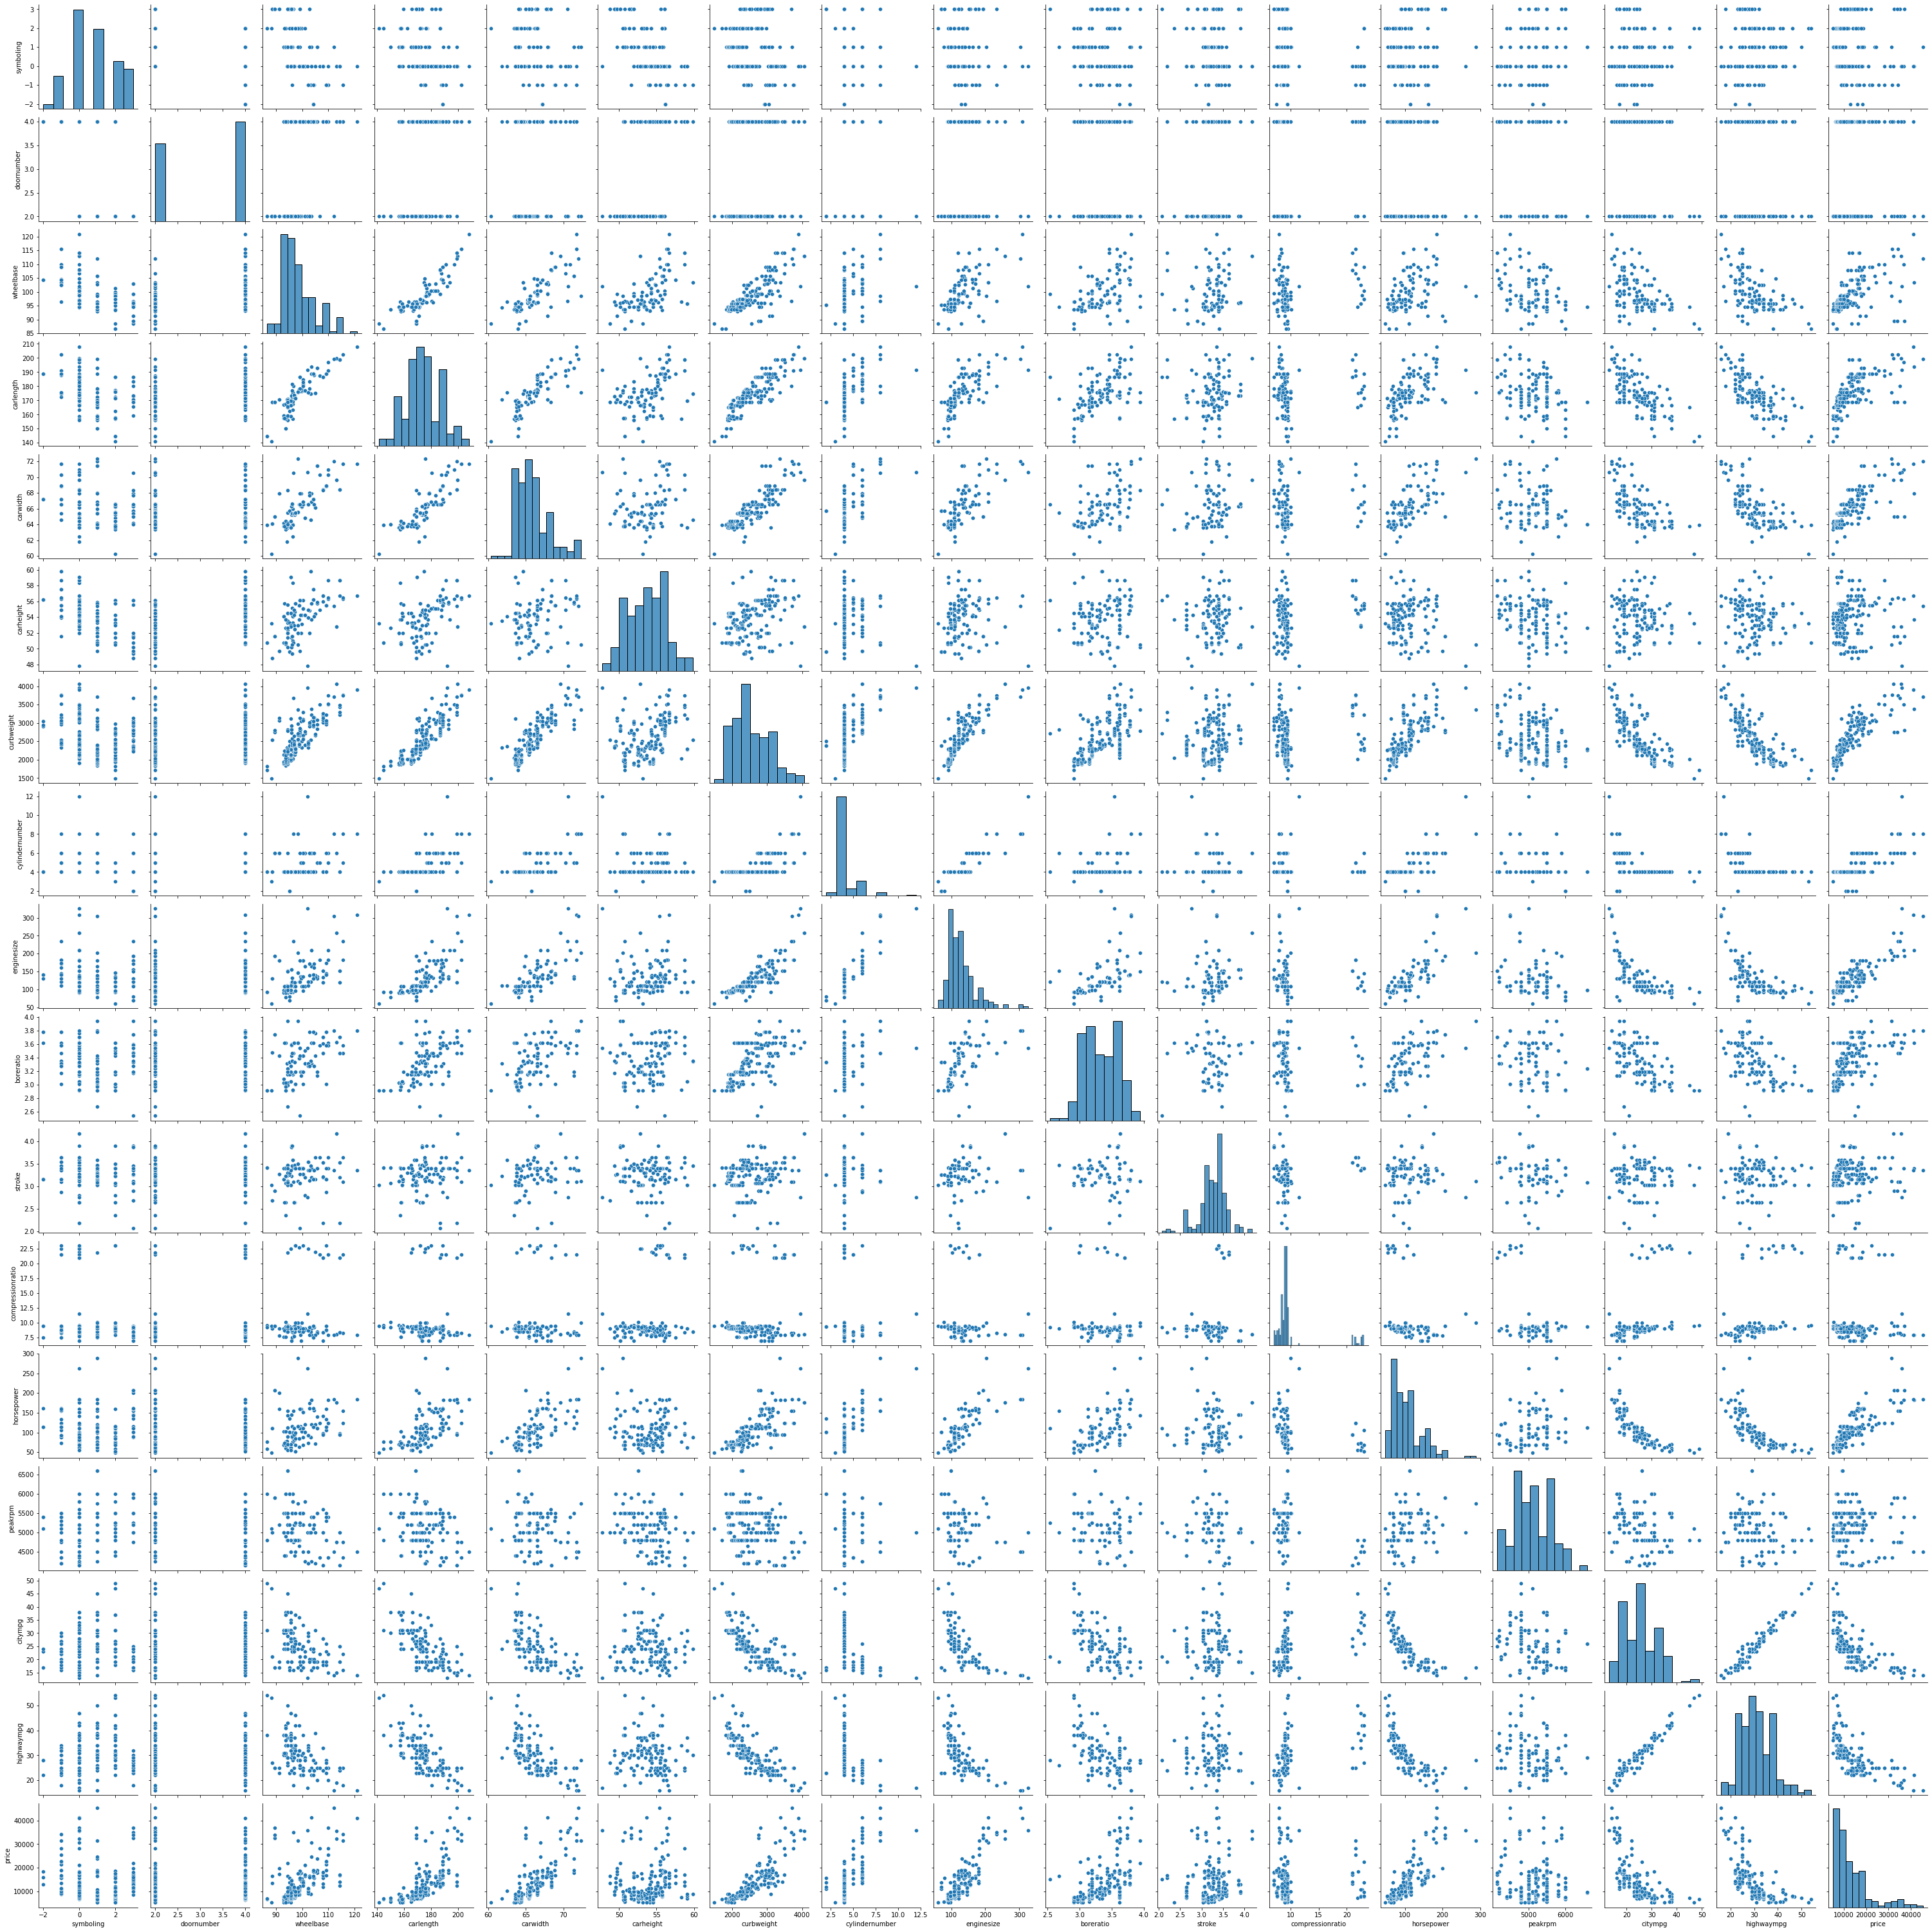

In [238]:
plt.figure(figsize=(30,30))
sns.pairplot(numeric)
plt.show()

In [239]:
corr= numeric.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

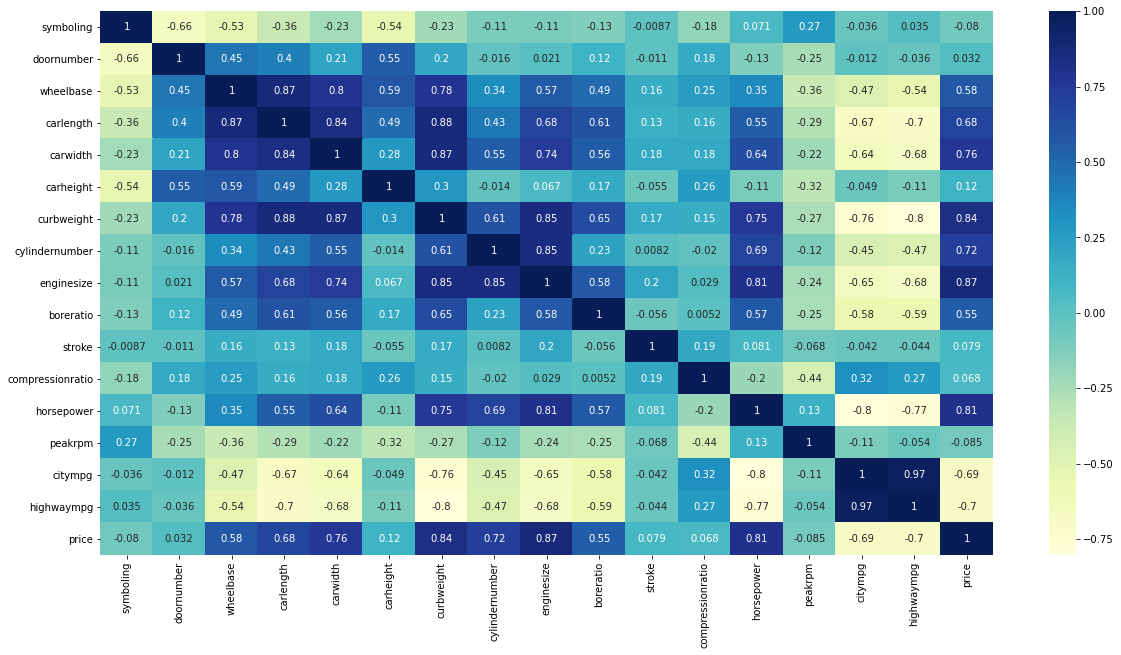

In [240]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='YlGnBu')
plt.show

* Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.
* Price is negatively correlated to symboling, citympg and highwaympg.
* This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.
* There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [241]:
categorical = cars.select_dtypes(include = ['object'])

In [242]:
categorical.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


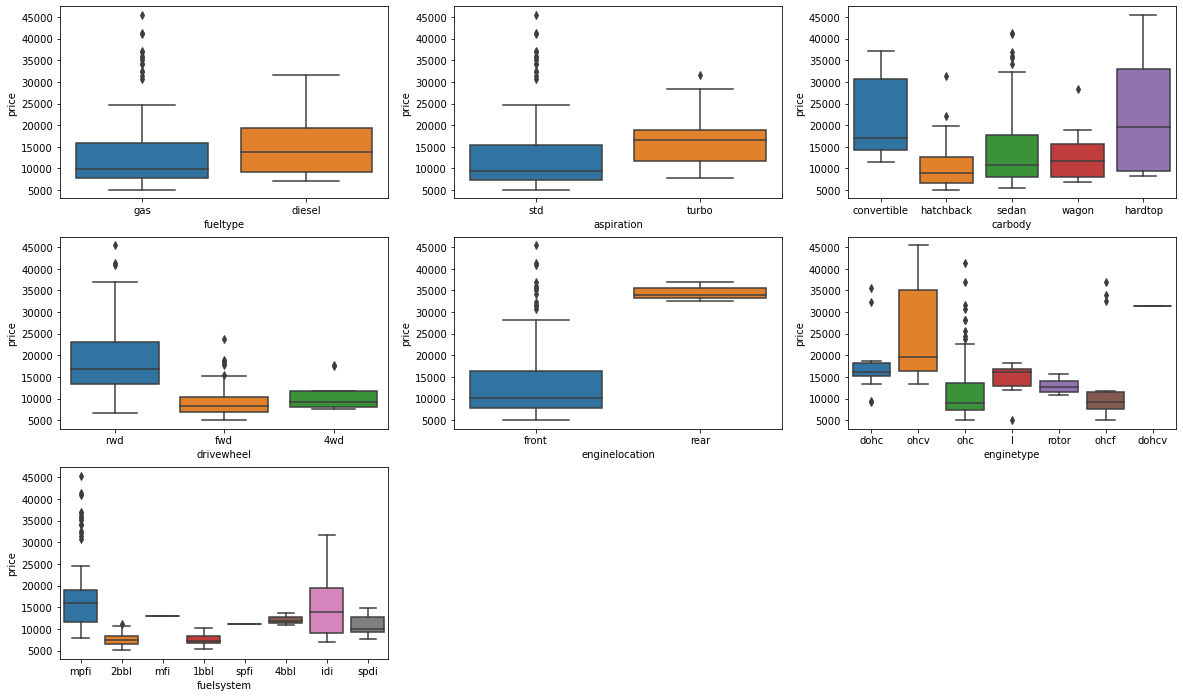

In [243]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.show()

1. The median price of gas vehicles is lower than that of Diesel Vehicles.
2. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles.
3. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of two-door vehicles.
4. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.
5. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines.
6. Almost all vehicles in the dataset have engines placed in the front of the vehicle.
7. The median cost of eight cylinder vehicles is higher than other cylinder categories.
8. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are also some outliers on the higher price side having MPFI systems.
9. Vehicles with OHCV engine type falls under higher price range.

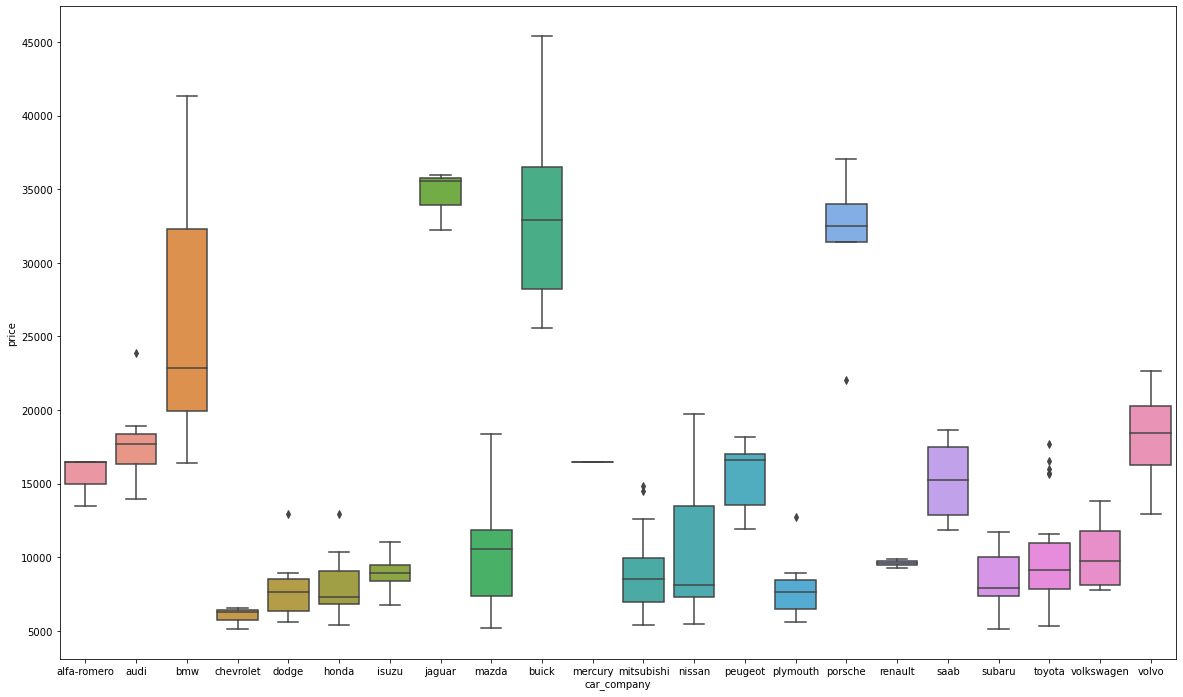

In [244]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars)
plt.show()

1. From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
2. Whereas the lower priced cars belong to chevrolet

In [245]:
cars_dummies = pd.get_dummies(categorical, drop_first=True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
cars=cars.drop(list(categorical.columns),axis=1)

In [247]:
cars.shape

(205, 17)

In [248]:
cars_dummies.shape

(205, 43)

In [249]:
cars=pd.concat([cars, cars_dummies],axis=1)

In [250]:
 cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

## Model Building

In [251]:
df_train,df_test=train_test_split(cars,train_size=0.7,random_state=100)

### Scaling 

In [252]:
scaler=StandardScaler()

In [253]:
cars.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercury',
       'car_company_mitsubishi', 'car_company_niss

In [254]:
varlist=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg','price']

In [255]:
df_train[varlist]=scaler.fit_transform(df_train[varlist])

In [256]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1


In [257]:
df_test[varlist]=scaler.fit_transform(df_test[varlist])

In [258]:
y_train= df_train.pop("price")

In [259]:
y_train

122   -0.700201
125    1.151929
166   -0.452248
1      0.442646
199    0.757569
         ...   
87    -0.485539
103    0.056898
67     1.606189
24    -0.877586
8      1.390627
Name: price, Length: 143, dtype: float64

In [260]:
x_train= df_train

In [261]:
x_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.170159,0.887412,-0.374195,-0.080993,-0.199352,-0.804764,-0.251520,-0.351431,-0.366345,-0.528342,...,0,0,0,0,0,0,0,0,0,0
103,-0.668901,0.887412,0.315930,0.890809,0.299187,0.638391,0.958998,1.381488,1.372551,0.471340,...,1,0,0,0,0,0,0,0,0,0
67,-1.507960,0.887412,1.931832,1.392642,2.021412,1.215653,1.797333,0.515029,1.421534,1.048080,...,0,0,0,0,0,0,0,0,0,0
24,0.170159,0.887412,-0.811836,-1.283797,-0.924500,-1.217094,-1.054847,-0.351431,-0.856174,-1.297329,...,0,0,0,0,0,0,0,0,0,0


In [262]:
lm=LinearRegression()

In [263]:
lm.fit(x_train,y_train)

LinearRegression()

In [264]:
lm.coef_

array([-8.85082799e-03,  2.05396206e-02,  2.15459688e-01, -1.20891864e-01,
        2.14312437e-01, -1.69734529e-01,  2.71975134e-01, -2.88819050e-01,
        9.98176607e-01, -3.16364315e-01, -1.09027004e-01, -4.45741225e-01,
       -1.28216803e-01,  1.89046429e-01,  6.10383234e-02,  7.95225308e-02,
       -7.13939879e-01,  3.92563218e-01, -5.68397039e-01, -6.33741325e-01,
       -5.33209547e-01, -4.44213621e-01, -6.30834556e-02,  4.57246372e-02,
        9.85062979e-01,  9.02650092e-01,  9.94703704e-01,  2.82949424e-01,
        6.10461201e-01,  8.12155616e-03,  1.12048455e+00,  1.19956250e-01,
       -3.05423110e-01,  7.13939879e-01, -1.11022302e-15, -4.00301122e-02,
       -5.85575952e-02, -2.22044605e-16, -1.28333697e-01,  1.01695043e+00,
        1.12409662e-01, -5.91117054e-01, -7.18611643e-01, -5.01548738e-01,
       -3.06608953e-01, -2.48183458e-01, -1.57753086e-01,  1.11022302e-16,
       -8.09182737e-01, -2.48597762e-01, -1.33327298e+00, -7.13453493e-01,
        7.94779273e-01, -

In [265]:
lm.intercept_

0.9701688083156522

 ## Feature Selection using RFE

In [266]:
lm = LinearRegression()
lm.fit(x_train, y_train)

# Subsetting training data for 15 selected columns
rfe1 = RFE(lr, 15)
rfe1.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [267]:
rfe1.ranking_

array([41, 39, 28, 31,  1, 26, 17, 32,  1, 18, 33,  1, 23, 24, 37, 30,  1,
       16, 14, 12, 13, 15, 35, 38,  1, 22,  1, 20,  1, 42,  1, 36, 10,  1,
       43, 27, 19, 44,  9,  1, 34,  8,  6,  4, 25, 29,  1, 45,  1,  2,  1,
        7, 11,  1, 21,  1,  3,  5, 40])

In [268]:
rfe1.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False,  True, False, False, False])

In [269]:
cols = x_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_peugeot',
       'car_company_renault', 'car_company_subaru'],
      dtype='object')

## Using Statsmodel 

### Model 1

In [270]:
x1 = x_train[cols]
x1_sm = sm.add_constant(x1)

lr1 = sm.OLS(y_train, x1_sm).fit()

In [271]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           4.59e-64
Time:                        17:28:07   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

All the p- values are significant. Let us check VIF.

In [272]:
vif=pd.DataFrame()

In [273]:
vif['features'] = x1.columns

In [274]:
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

In [275]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


We see that there are a few variables which have large VIF. These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. So let's try and build a model with 10 features this time using RFE.

### Bulding model with 10 features

In [276]:
lr2 = LinearRegression()
rfe2 = RFE(lr2, 10)
rfe2.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [277]:
col2 = x_train.columns[rfe2.support_]
col2

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

### Model 2

In [278]:
x2 = x_train[col2]
x2_sm = sm.add_constant(x2)

lm2 = sm.OLS(y_train, x2_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.98e-64
Time:                        17:28:27   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [279]:
vif=pd.DataFrame()
vif['features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,enginelocation_rear,inf
4,enginetype_ohcf,inf
9,car_company_subaru,inf
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
5,enginetype_rotor,1.14
6,car_company_bmw,1.09
8,car_company_renault,1.00


### Model 3

In [280]:
x3 = x2.drop(['car_company_subaru'], axis =1)
x3_sm = sm.add_constant(x3)

model3 = sm.OLS(y_train,x3_sm).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.98e-64
Time:                        17:29:01   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [281]:
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
2,enginelocation_rear,1.19
5,enginetype_rotor,1.14
4,enginetype_ohcf,1.11
6,car_company_bmw,1.09
8,car_company_renault,1.00


### Model 4

In [282]:
x4 = x3.drop(['enginetype_ohcf'], axis =1)
x4_sm = sm.add_constant(x4)

model4 = sm.OLS(y_train,x4_sm).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           8.22e-65
Time:                        17:29:18   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [283]:
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,enginetype_rotor,1.14
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
7,car_company_renault,1.00


### Model 5

In [284]:
x5 = x4.drop(['car_company_peugeot'], axis =1)
x5_sm = sm.add_constant(x5)

model5 = sm.OLS(y_train,x5_sm).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           8.22e-65
Time:                        17:29:36   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [285]:
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.13
0,carwidth,2.89
4,enginetype_rotor,1.13
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
3,enginetype_l,1.08
6,car_company_renault,1.00


## Residual Analysis

In [286]:
y_train_pred = model4.predict(x4_sm)
y_train_pred.head()

122   -0.809950
125    0.759500
166   -0.768292
1     -0.365793
199    0.279909
dtype: float64

In [287]:
Residual = y_train - y_train_pred

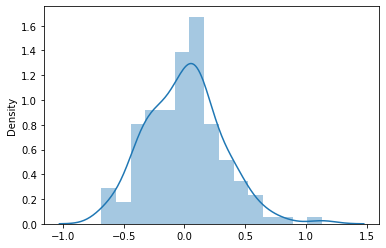

In [288]:
sns.distplot(Residual, bins =15)
plt.show()

### Making prediction

In [289]:
final_cols = x5.columns

In [291]:
y_test=df_test.pop("price")

In [292]:
x_test=df_test

In [293]:
x_test_rf=x_test[col2]

In [294]:
x_test_model5 = x_test[final_cols]
x_test_model5.head()

,carwidth,enginesize,enginelocation_rear,enginetype_l,enginetype_rotor,car_company_bmw,car_company_renault
160,-0.845273,-0.780488,0,0,0,0,0
186,-0.286672,-0.523466,0,0,0,0,0
59,0.221147,-0.219712,0,0,0,0,0
165,-1.048400,-0.780488,0,0,0,0,0
140,-1.149964,-0.546831,0,0,0,0,0


In [295]:
x_test_sm = sm.add_constant(x_test_model5)

In [299]:
y_pred = model5.predict(x_test_sm)
y_pred.head()

160   -0.812264
186   -0.451285
59    -0.087363
165   -0.895849
140   -0.818443
dtype: float64

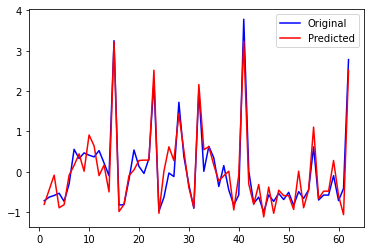

In [300]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test, color='Blue')
plt.plot(c, y_pred, color='Red')
plt.legend(['Original', 'Predicted'])
plt.show()

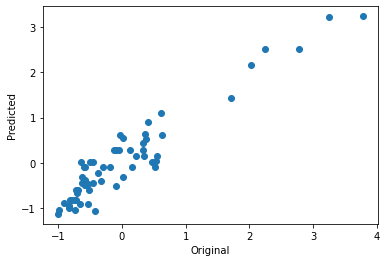

In [301]:
plt.scatter(y_test, y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

### Evaluation

In [302]:
r_sq = r2_score(y_test,y_pred)
r_sq

0.9014968481414879

<AxesSubplot:>

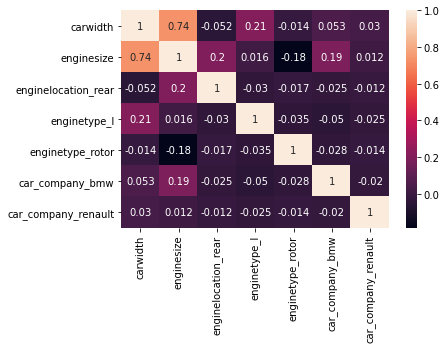

In [303]:
sns.heatmap(cars[final_cols].corr(),annot=True)

In [304]:
final_cols

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_rotor', 'car_company_bmw', 'car_company_renault'],
      dtype='object')

The Linear equation for the price of the car is 

car price =  -0.0635+ 0.4596*car_width + 2.1107*enginelocation_rear + 0.4870*enginesize +  0.9641*enginetype_l + 0.7137* enginetype_rotor + 1.1312*car_company_bmw -0.6133*car_company_renault

Variables that are significant in predicting the price of a car are:
* carwidth
* enginelocation_rear
* enginetype_rotor
* enginesize
* enginetype
* car_company_bmw
* car_company_renault